In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
# 1. Провести повний аналіз даних.
# Імпортування даних та виведення перших 5 рядків
df = pd.read_csv("mushroom_cleaned.csv")

df.head(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [3]:
# Визначення інформації по датасету
df.shape

(54035, 9)

In [4]:
# Визначення розміру датасету
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [5]:
# Визначення назв колонок
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [6]:
# Перевірка на наявність дуплікатів
df.duplicated().sum()

303

In [7]:
# Видалення дуплікатів
df.drop_duplicates(inplace=True)

In [8]:
# Повторна перевірка на наявність дуплікатів
df.duplicated().sum()

0

In [9]:
# Перевірка на наявність нулів
df.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

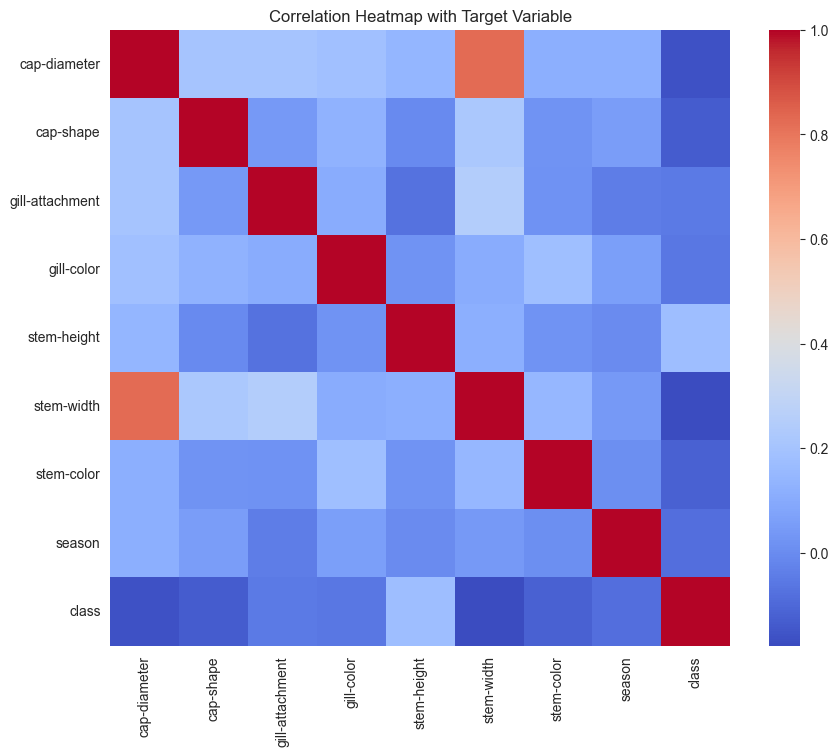

In [10]:
# Якщо у вас є категоричні змінні, їх треба закодувати
df_encoded = pd.get_dummies(df, drop_first=True)

# Підрахунок кореляцій
correlation_matrix = df_encoded.corr()

# Вибір кореляцій із цільовою змінною (припустимо, що цільова змінна — 'class')
target_correlation = correlation_matrix['class'].sort_values(ascending=False)

# Побудова теплової карти
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap with Target Variable')
plt.show()

In [11]:
# 2. Побудувати дві моделі класифікації на вибір (наприклад, Випадковий ліс і логістичну регресію), 
# підібрати параметри. Оцінити моделі. Вибрати найкращу. Вивести метрики, матрицю плутанини, класифікаційний звіт.

# Визначаємо X (всі ознаки) та y (цільова змінна 'class')
X = df.drop('class', axis=1)
y = df['class']

# Розділення даних на тренувальні і тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Випадковий ліс
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200]})

In [13]:
# Логістична регресія
lr = LogisticRegression(random_state=42, max_iter=1000)
lr_params = {'C': [0.1, 1, 10]}
lr_grid = GridSearchCV(lr, lr_params, cv=5)
lr_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10]})

In [14]:
# Оцінка моделей
y_pred_rf = rf_grid.predict(X_test_scaled)
y_pred_lr = lr_grid.predict(X_test_scaled)

In [15]:
# Оцінка для випадкового лісу
print("Випадковий ліс:")
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {rf_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Оцінка для логістичної регресії
print("\nЛогістична регресія:")
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {lr_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Вибір найкращої моделі на основі точності
if rf_accuracy > lr_accuracy:
    print("\nВипадковий ліс є краща модель.")
else:
    print("\nЛогістична регресія є краща модель.")

Випадковий ліс:
Accuracy: 0.9900124069478908
Confusion Matrix:
[[7193   84]
 [  77 8766]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7277
           1       0.99      0.99      0.99      8843

    accuracy                           0.99     16120
   macro avg       0.99      0.99      0.99     16120
weighted avg       0.99      0.99      0.99     16120


Логістична регресія:
Accuracy: 0.628970223325062
Confusion Matrix:
[[3911 3366]
 [2615 6228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      7277
           1       0.65      0.70      0.68      8843

    accuracy                           0.63     16120
   macro avg       0.62      0.62      0.62     16120
weighted avg       0.63      0.63      0.63     16120


Випадковий ліс є краща модель.


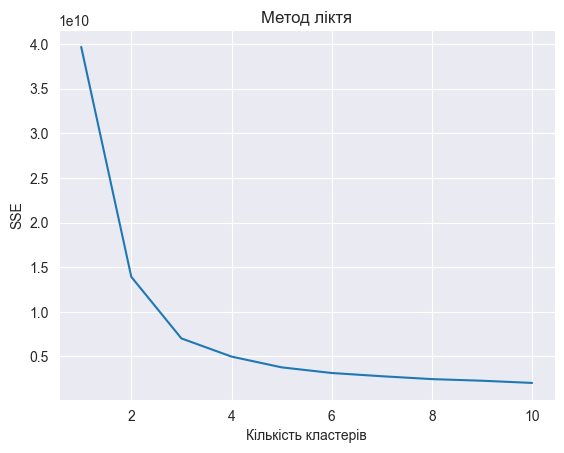

In [16]:
# 3. Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
# Метод ліктя
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.title('Метод ліктя')
plt.show()

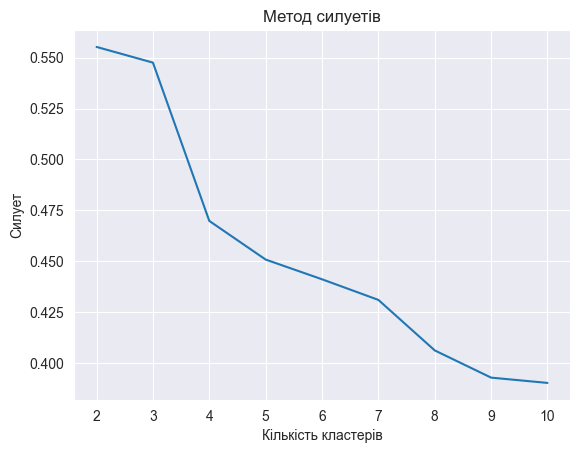

In [17]:
# Метод силуетів
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Кількість кластерів')
plt.ylabel('Силует')
plt.title('Метод силуетів')
plt.show()

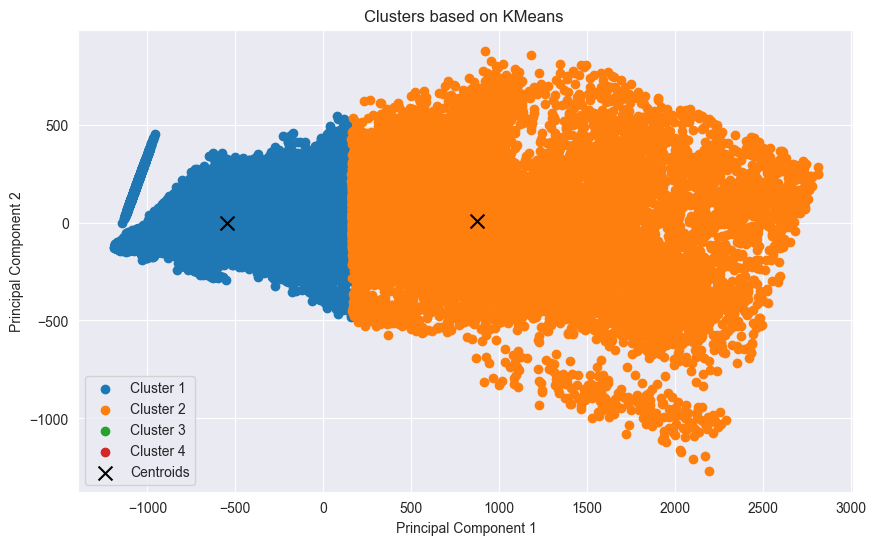

In [18]:
#Використання PCA для зменшення розмірності
pca = PCA(n_components=2)  # Вибираємо 2 головні компоненти для прикладу
X_pca = pca.fit_transform(X)

# Кластеризація з KMeans з k = 2 - загальна кількість класів
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Отримання міток кластерів та центроїдів
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Візуалізація кластерів
plt.figure(figsize=(10, 6))

# Відокремлення точок для кожного кластера та відображення їх на графіку
for i in range(4):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i+1}')

# Відображення центроїдів
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on KMeans ')
plt.legend()
plt.grid(True)
plt.show()

Кількість кластерів: 21
Кількість шуму: 53628


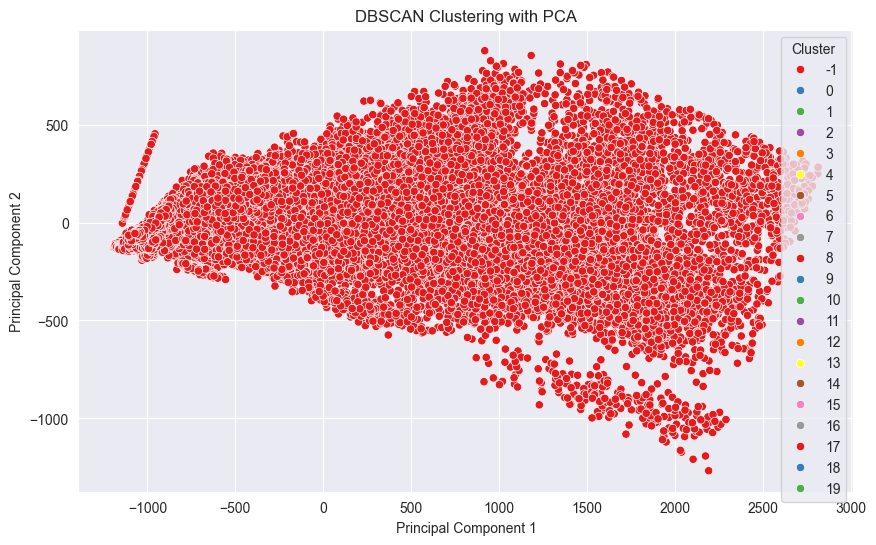

In [19]:
# Запускаємо DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_pca)

# Виводимо кількість кластерів та кількість шуму
n_clusters = len(set(df['Cluster'])) - (1 if -1 in df['Cluster'] else 0)
n_noise = list(df['Cluster']).count(-1)
print(f'Кількість кластерів: {n_clusters}')
print(f'Кількість шуму: {n_noise}')

# Візуалізація результатів
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1', legend='full')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()